
--- Analyserar siffra1.jpg ---
Modellen gissar på siffra: 1
Sannolikhet för gissningen: 28.8%


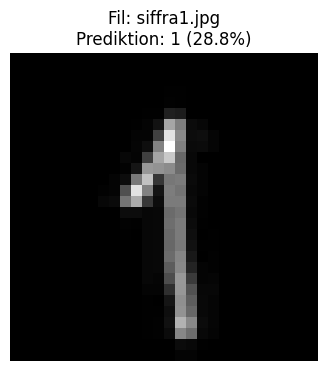

Alla sannolikheter:
  Siffra 1: 28.8%
  Siffra 3: 11.6%
  Siffra 4: 8.8%
  Siffra 5: 12.0%
  Siffra 7: 9.2%
  Siffra 9: 19.6%

--- Analyserar siffra2.jpg ---
Modellen gissar på siffra: 2
Sannolikhet för gissningen: 53.6%


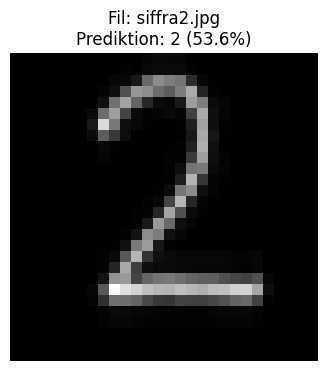

Alla sannolikheter:
  Siffra 1: 14.8%
  Siffra 2: 53.6%
  Siffra 3: 8.4%
  Siffra 5: 5.2%
  Siffra 6: 8.4%

--- Analyserar siffra6.jpg ---
Modellen gissar på siffra: 6
Sannolikhet för gissningen: 47.2%


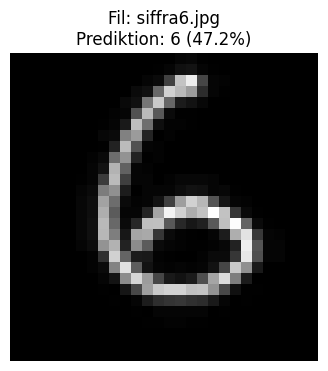

Alla sannolikheter:
  Siffra 2: 6.8%
  Siffra 3: 7.2%
  Siffra 4: 14.0%
  Siffra 5: 12.0%
  Siffra 6: 47.2%


In [65]:
import importlib
import preprocess
from joblib import load
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Se till att vi har den senaste versionen av din bildbehandling
importlib.reload(preprocess)
from preprocess import preprocess_image

# 2. Ladda scaler och modell
model = load("mnist_extratrees_final.joblib")
scaler = load("mnist_scaler.joblib")

# 3. Skapa en Pipeline
# Detta gör att vi slipper köra scaler.transform(X) manuellt varje gång
pipe = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# 4. Lista på bilder att testa
image_files = ["siffra1.jpg", "siffra2.jpg", "siffra6.jpg"]

for image_path in image_files:
    print(f"\n--- Analyserar {image_path} ---")
    
    try:
        # Preprocessa bilden
        X, img_28 = preprocess_image(image_path)

        # 5. Prediktion via Pipeline (skalning sker internt)
        pred = pipe.predict(X)[0]
        proba = pipe.predict_proba(X)[0]

        print(f"Modellen gissar på siffra: {pred}")
        print(f"Sannolikhet för gissningen: {proba[pred]:.1%}")

        # Visa resultaten
        plt.figure(figsize=(4, 4))
        plt.imshow(img_28, cmap="gray")
        plt.title(f"Fil: {image_path}\nPrediktion: {pred} ({proba[pred]:.1%})")
        plt.axis("off")
        plt.show()

        # Skriv ut alla sannolikheter för felsökning
        print("Alla sannolikheter:")
        for i, p in enumerate(proba):
            if p > 0.05: # Visa bara de som är någorlunda relevanta (>5%)
                print(f"  Siffra {i}: {p:.1%}")
                
    except Exception as e:
        print(f"Kunde inte bearbeta {image_path}: {e}")